In [9]:
#1. Set up the Database
import sqlite3
connection = sqlite3.connect('student_grades.db')
print ("Database Connected")

cursor = connection.cursor()
print ("Cursor successful")

Database Connected
Cursor successful


In [55]:
cursor.execute('DROP TABLE students')
cursor.execute('DROP TABLE grades')

In [56]:


#2. Create the Necessary Tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Student table")

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table")

Student table
Grades table


In [57]:
#3 Insert Data into the Tables
student_table = [
    (1,'Jesus','Nazareth'),
    (2,'John', 'Potter'),
    (3,'Luke','Smith'),
    (4,'Job','Duke'),
    (5,'Mary','Magdalene')
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''',student_table)

connection.commit()

print("Data inserted into students table")



Data inserted into students table


In [58]:
grades_table = [
    (1,1,'History',100),
    (2,3,'English',83),
    (3,2,'Math',79),
    (4,4,'History',84),
    (5,3,'English',88)
]

cursor.executemany('''
INSERT INTO grades (grade_id,student_id,subject,grade) VALUES (?, ?, ?, ?)
''', grades_table)

connection.commit()

print("Data inserted into grades table")

Data inserted into grades table


In [63]:
#4.Perform SQL Queries
#4.1
cursor.execute ("SELECT first_name, grade FROM grades JOIN students ON students.student_id = grades.student_id")
rows = cursor.fetchall()
print(rows)


[('Jesus', 100), ('Luke', 83), ('John', 79), ('Job', 84), ('Luke', 88)]


In [65]:
#4.2

cursor.execute ("SELECT AVG (grade) FROM grades GROUP BY student_id")
rows = cursor.fetchall()
print(rows)

[(100.0,), (79.0,), (85.5,), (84.0,)]


In [71]:
#4.3
cursor.execute ("""SELECT students.first_name, students.last_name, AVG(grades.grade) AS avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1""");
rows = cursor.fetchall()
print(rows)



[('Jesus', 'Nazareth', 100.0)]


In [74]:
#4.4
cursor.execute ("SELECT AVG (grade) FROM grades WHERE subject = 'Math'")
rows = cursor.fetchall()
print(rows)

[(79.0,)]


In [77]:
#4.5
cursor.execute("SELECT first_name,last_name FROM students JOIN grades ON students.student_id = grades.student_id WHERE grades.grade >90 GROUP BY students.student_id")
rows = cursor.fetchall()
print(rows)

[('Jesus', 'Nazareth')]


In [83]:
#5
import pandas as pd
dfstudents= pd.read_sql_query('SELECT * FROM students', connection)
dfstudents.head()


,student_id,first_name,last_name
0,1,Jesus,Nazareth
1,2,John,Potter
2,3,Luke,Smith
3,4,Job,Duke
4,5,Mary,Magdalene


In [84]:
dfgrades= pd.read_sql_query('SELECT * FROM grades', connection)
dfgrades.head()

,grade_id,student_id,subject,grade
0,1,1,History,100
1,2,3,English,83
2,3,2,Math,79
3,4,4,History,84
4,5,3,English,88


In [88]:
dfcombined= pd.read_sql_query ("SELECT students.first_name, students.last_name, grades.subject, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id", connection)
dfcombined.head ()

,first_name,last_name,subject,grade
0,Jesus,Nazareth,History,100
1,Luke,Smith,English,83
2,John,Potter,Math,79
3,Job,Duke,History,84
4,Luke,Smith,English,88


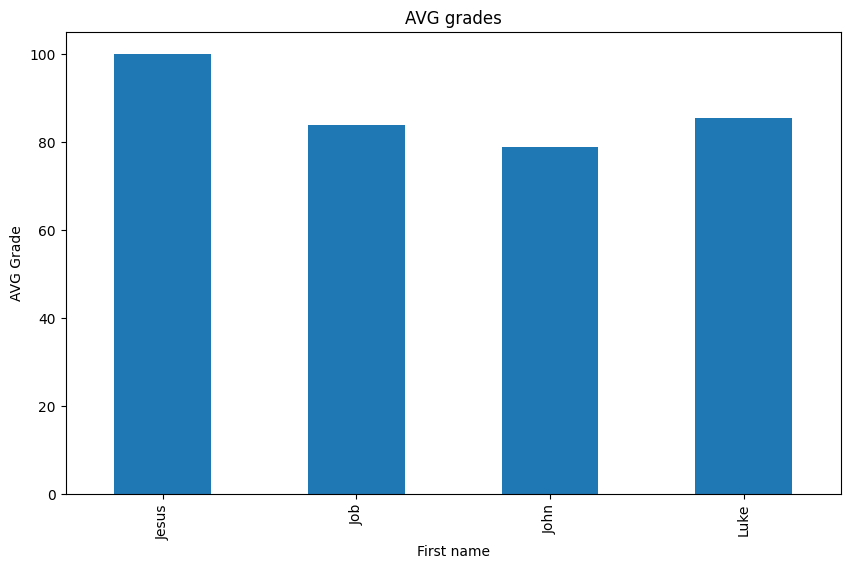

In [93]:
import matplotlib.pyplot as plt
avg_grades = dfcombined.groupby('first_name')['grade'].mean()
plt.figure(figsize=(10, 6))
avg_grades.plot(kind='bar')
plt.title('AVG grades')
plt.xlabel('First name')
plt.ylabel('AVG Grade')

plt.show()

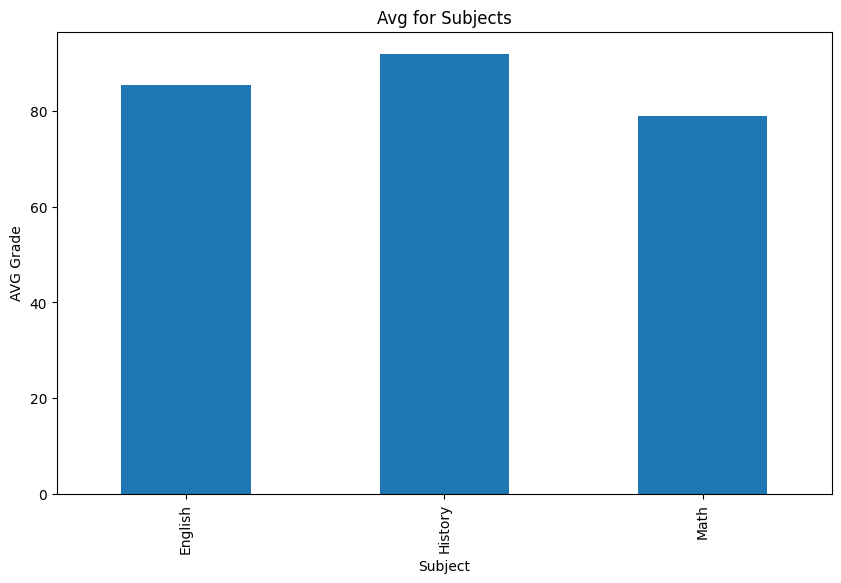

In [95]:
avg_subject = dfcombined.groupby('subject')['grade'].mean()
plt.figure(figsize=(10, 6))
avg_subject.plot(kind='bar')
plt.title('Avg for Subjects')
plt.xlabel('Subject')
plt.ylabel('AVG Grade')
plt.show()